In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data into dataframe
df = pd.read_csv("C:\\Users\\faiza\\OneDrive\\Desktop\\CO2 Emissions_Canada.csv",encoding="ISO-8859-1")
df.head(11)

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumptionCity,FuelConsumptionHwy,FuelConsumptionComb,FuelConsumptionComb.1,CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
#Let's select some features that we want to use for regression.
cdf = df[['EngineSize','Cylinders','FuelConsumptionComb','CO2Emissions']]
cdf.head(11)

,EngineSize,Cylinders,FuelConsumptionComb,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


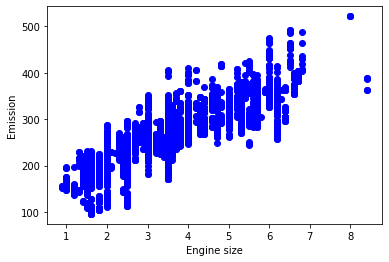

In [4]:
#plotting to check linearity of graph EngineSize vs emission
plt.scatter(cdf.EngineSize, cdf.CO2Emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

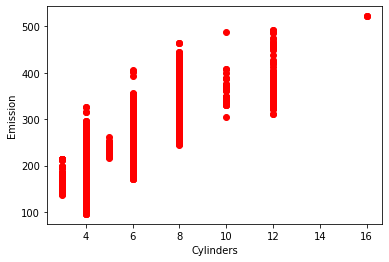

In [5]:
#plotting to check linearity of graph cylinders vs emission
plt.scatter(cdf.Cylinders, cdf.CO2Emissions,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

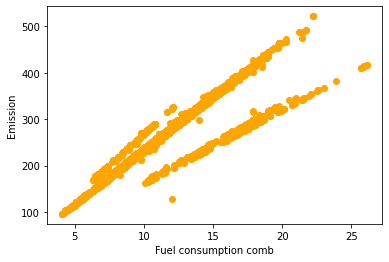

In [6]:
#plotting to check linearity of graph fuelconsumption vs emission
plt.scatter(cdf.FuelConsumptionComb, cdf.CO2Emissions,  color='orange')
plt.xlabel("Fuel consumption comb")
plt.ylabel("Emission")
plt.show()

In [7]:
#train split dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [8]:
msk

array([ True,  True, False, ...,  True,  True,  True])

In [9]:
#Polynomial regression
#Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. 
#In fact, many different regressions exist that can be 
#used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['FuelConsumptionComb']])
train_y = np.asanyarray(train[['CO2Emissions']])

test_x = np.asanyarray(test[['FuelConsumptionComb']])
test_y = np.asanyarray(test[['CO2Emissions']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.  ,   8.5 ,  72.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  11.1 , 123.21],
       ...,
       [  1.  ,  10.3 , 106.09],
       [  1.  ,   9.9 ,  98.01],
       [  1.  ,  10.7 , 114.49]])

In [11]:
cdf

,EngineSize,Cylinders,FuelConsumptionComb,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7380,2.0,4,9.4,219
7381,2.0,4,9.9,232
7382,2.0,4,10.3,240
7383,2.0,4,9.9,232


In [12]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         38.55612925 -0.81445763]]
Intercept:  [-67.71124274]


Text(0, 0.5, 'Emission')

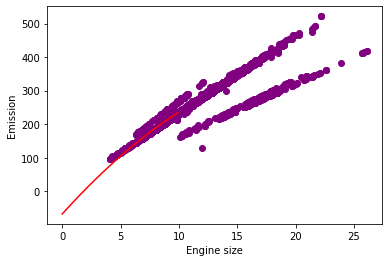

In [13]:
plt.scatter(train.FuelConsumptionComb, train.CO2Emissions,  color='purple')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 10.79
Residual sum of squares (MSE): 438.00
R2-score: 0.88


In [15]:
test_y

array([[136],
       [230],
       [239],
       ...,
       [221],
       [208],
       [208]], dtype=int64)

In [16]:
test_y_

array([[131.41864982],
       [236.40428703],
       [245.1807645 ],
       ...,
       [222.75089626],
       [210.92511892],
       [210.92511892]])